In [403]:
!pip install haversine

# 신용카드 이상거래 탐지

## 필요한 패키지 import

In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from haversine import haversine

## 데이터 Load

In [405]:
pd.set_option('display.max_columns', None)

card_df = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/Credit/fraud.csv')

## Column Describe
##### trans_date_trans_time : 거래일시 / object
##### cc_num : 카드 번호 / int
##### merchant : 카드 결제 장소 / objcet
##### category : 카드 결제 장소 및 방법 ex) grocery_pos : 식료품점 카드 결제 / object
##### amt : 결제 금액 / float
##### first : 이름 / objcet
##### last : 성 / objcet
##### gender : 성별 / objcet
##### street : 주소 / object
##### city : 도시 이름 / object
##### state : 미국의 42개 주를 표현
##### zip : 우편 번호 / int
##### lat : 위도 / float
##### long : 경도 / float
##### city_pop : 도시의 인구수 / int
##### job : 직업 / object
##### dob : 생년월일 / object
##### trans_num : 거래 번호 / object
##### unix_time : 거래 시간 / int
##### merch_lat : 결제를 한 장소의 위도 / float
##### merch_long : 결제를 한 장소의 경도 / float
##### **is_fraud : 이상 거래(타겟 변수) / int**

In [406]:
card_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [407]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [408]:
card_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


----
## 결측치
### 결측치는 따로 존재하지 않음

In [409]:
card_df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


-----
## 이상치


### trans_date_trans_time
#### object > datetime 형식으로 변경

In [410]:
card_df['trans_date_trans_time'] = pd.to_datetime(card_df['trans_date_trans_time'])

In [411]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   amt                    491134 non-null  float64       
 5   first                  491134 non-null  object        
 6   last                   491134 non-null  object        
 7   gender                 491134 non-null  object        
 8   street                 491134 non-null  object        
 9   city                   491134 non-null  object        
 10  state                  491134 non-null  object        
 11  zip                    491134 non-null  int64         
 12  lat                    491134 non-null  floa

### amt
#### 25,000의 경우 이상치로 추정
##### + 10,000의 데이터의 표본수가 적음 (노이즈 의심)
##### >> Drop

<Axes: xlabel='None', ylabel='amt'>

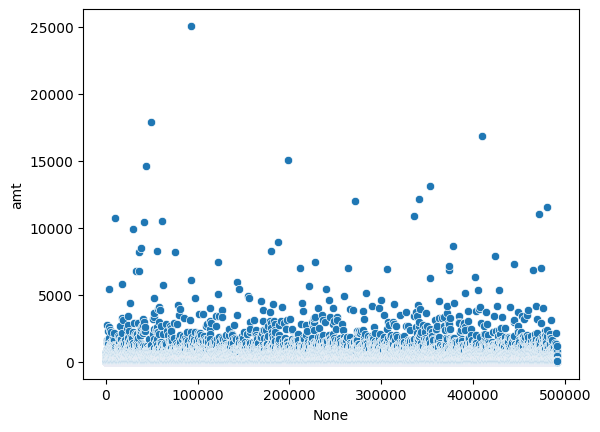

In [412]:
sns.scatterplot(x = card_df.index, y = card_df['amt'])

In [413]:
card_df[card_df['amt'] > 10000].value_counts().sum()

14

In [414]:
card_df.drop(card_df[card_df['amt'] > 10000].index, inplace = True)

In [415]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491120 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491120 non-null  datetime64[ns]
 1   cc_num                 491120 non-null  int64         
 2   merchant               491120 non-null  object        
 3   category               491120 non-null  object        
 4   amt                    491120 non-null  float64       
 5   first                  491120 non-null  object        
 6   last                   491120 non-null  object        
 7   gender                 491120 non-null  object        
 8   street                 491120 non-null  object        
 9   city                   491120 non-null  object        
 10  state                  491120 non-null  object        
 11  zip                    491120 non-null  int64         
 12  lat                    491120 non-null  float64  

## 중복
#### 중복되는 행은 없는 것으로 확인

In [416]:
card_df[card_df.duplicated(keep=False)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


----
## Feature Engeering

### 카테고리 재분류

#### category
##### 1. food(grocery_pos, grocery_net, food_dining)
##### 2. shopping(shopping_net, shopping_pos, home, kids_pets)
##### 3. health(heal_fitness , personal_care)
##### 4. venhicle(gas_transport)
##### 5. activity(travel, entertainment)
##### 6. others(misc_poss, misc_net)

In [417]:
food_list = ['grocery_pos', 'grocery_net', 'food_dining']
shopping_list = ['shopping_net', 'shopping_pos', 'home', 'kids_pets']
health_list = ['health_fitness', 'personal_care']
activity_list = ['travel', 'entertainment']
others_list = ['misc_pos', 'misc_net']
new_data = []

In [418]:
for col in card_df['category']:
  if col in food_list:
    new_data.append('food')
  elif col in shopping_list:
    new_data.append('shopping')
  elif col in health_list:
    new_data.append('health')
  elif col in activity_list:
    new_data.append('activity')
  elif col in others_list:
    new_data.append('others')
  else:
    new_data.append(col)

card_df['category'] = new_data

In [419]:
card_df['category'].unique()

array(['food', 'others', 'gas_transport', 'health', 'activity',
       'shopping'], dtype=object)


#### trans_date_trans_time
##### 시간을 새벽, 오전, 오후, 밤으로 나눔

In [420]:
card_df['trans_date_trans_time'].dt.hour

,trans_date_trans_time
0,0
1,0
2,0
3,0
4,0
...,...
491129,23
491130,23
491131,23
491132,23


In [421]:
timelist = []

for hour in card_df['trans_date_trans_time'].dt.hour:
  if hour >= 0 and hour <= 6:
    timelist.append('midnight')
  elif hour >= 7 and hour <= 12:
    timelist.append('morning')
  elif hour >= 13 and hour <= 18:
    timelist.append('afternoon')
  elif hour >= 19 and hour <= 24:
    timelist.append('night')

card_df['timelist'] = timelist


In [422]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491120 entries, 0 to 491133
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491120 non-null  datetime64[ns]
 1   cc_num                 491120 non-null  int64         
 2   merchant               491120 non-null  object        
 3   category               491120 non-null  object        
 4   amt                    491120 non-null  float64       
 5   first                  491120 non-null  object        
 6   last                   491120 non-null  object        
 7   gender                 491120 non-null  object        
 8   street                 491120 non-null  object        
 9   city                   491120 non-null  object        
 10  state                  491120 non-null  object        
 11  zip                    491120 non-null  int64         
 12  lat                    491120 non-null  float64  

-----
### Q. 한사람이 여러번 결제사기를 한 케이스가 존재하는가?
### A. 존재함 (Larry Houst의 결제 사기 데이터가 여러개 존재)

In [423]:
card_df[card_df['is_fraud'] == 1]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,timelist
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,midnight
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,food,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,midnight
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,afternoon
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,night
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,fraud_Murray-Smitham,food,358.24,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,8a5d80eb4f573480db90899dd8b1c34a,1387592501,47.526202,-113.643313,1,midnight
477847,2020-12-21 02:36:03,4716561796955522,fraud_Schmidt and Sons,shopping,859.12,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,fe8464ee336fe08b2adacdd0867b1343,1387593363,48.272348,-112.328075,1,midnight
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,shopping,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1,night
479305,2020-12-21 22:42:11,4716561796955522,fraud_Schulist Ltd,food,123.58,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,daabc7ccf6ccf2c85c1f6186ca11193a,1387665731,48.913048,-113.214921,1,night



#### 결제 사기를 한 사람들의 횟수를 보기 위해 성 + 이름 컬럼 합산



In [424]:
card_df['Name'] = card_df['first'] + '_' + card_df['last']

In [425]:
card_df['Name'].value_counts()

,count
Name,
Lisa_Lin,4392
Gina_Grimes,4391
Sabrina_Johnson,4386
Gary_Martinez,4386
Jodi_Rodriguez,4386
...,...
Ana_Mccormick,3641
Tammy_Davis,3638
William_Perry,3638



#### 결제 사기를 한 사람들의 횟수
##### 한번의 결제 사기 기록이 있는 반면 대다수의 사람들이 과거 기록이 있음

In [426]:
trash_people = card_df.groupby('Name')['is_fraud'].sum().reset_index()
trash_people

,Name,is_fraud
0,Adam_Santos,9
1,Allison_Allen,14
2,Allison_Ayala,12
3,Amber_Lewis,5
4,Ana_Howell,16
...,...,...
119,Tyler_Wright,12
120,Valerie_Davis,7
121,Vicki_Mendoza,13
122,Victoria_Fleming,15


In [427]:
trash_people.describe()

,is_fraud
count,124.000000
mean,10.032258
std,4.048357
min,0.000000
25%,7.000000
50%,10.000000
75%,13.000000
max,18.000000



#### 결제 사기 횟수가 2번 이상인 사람들의 비율을 계산
##### 거의 전부 2번 이상의 결제 사기를 시행
##### 일정 횟수 이상인 사람들을 걸러내기엔 결제 사기 데이터비율이 현저히 낮음

In [428]:
trash_people[trash_people['is_fraud'] > 1]['Name'].nunique() / trash_people['Name'].nunique() * 100

98.38709677419355

#### 결제 횟수 중 결제 사기 데이터의 비율
##### 따로 계산해 보지 않아도 비율이 현저히 낮음을 알 수 있으며 '요주 인물' 이라는 컬럼은 오히려 노이즈를 발생 할 수 있음
##### **Cancel**

In [429]:
card_df['is_fraud'].value_counts()

,count
is_fraud,
0,489876
1,1244


In [430]:
card_df.drop('Name', axis = 1, inplace = True)

In [431]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491120 entries, 0 to 491133
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491120 non-null  datetime64[ns]
 1   cc_num                 491120 non-null  int64         
 2   merchant               491120 non-null  object        
 3   category               491120 non-null  object        
 4   amt                    491120 non-null  float64       
 5   first                  491120 non-null  object        
 6   last                   491120 non-null  object        
 7   gender                 491120 non-null  object        
 8   street                 491120 non-null  object        
 9   city                   491120 non-null  object        
 10  state                  491120 non-null  object        
 11  zip                    491120 non-null  int64         
 12  lat                    491120 non-null  float64  

----
### Q. 주소 위도, 경도와 결제 장소의 위도, 경도의 차이가 유의미한 데이터일까?
### A. 124명의 데이터로 이루어져 있기에 경도와 위도의 차이를 이용하여 특정패턴을 기대 해볼 수 있음
### ex) 거주지에서 거리가 멀어질 수록 결제사기 빈도 증가

#### 위도, 경도를 이용한 거리계산 메소드(haversine)

In [432]:
def loc_diff(lat, long_, merch_lat, merch_long):
  original_loc = (lat, long_)
  moving_loc = (merch_lat, merch_long)

  return haversine(original_loc, moving_loc, unit = 'km')


#### 거리 계산(단위 : km)

In [433]:
card_df['loc_diff(km)'] = card_df.apply(lambda x : loc_diff(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis = 1).round(1)

In [434]:
card_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,timelist,loc_diff(km)
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",food,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,midnight,30.2
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",food,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,midnight,84.7
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,food,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,midnight,67.8
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,food,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,midnight,22.3
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,others,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,midnight,79.6


-----
### 로그

#### amt
##### 결제 금액을 그래프로 그려보면 심하게 좌측으로 편향되어있음
##### 로그를 이용하여 좌측편향 문제 해결

<ipython-input-435-0d3285db49b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(card_df['amt'])


<Axes: xlabel='amt', ylabel='Density'>

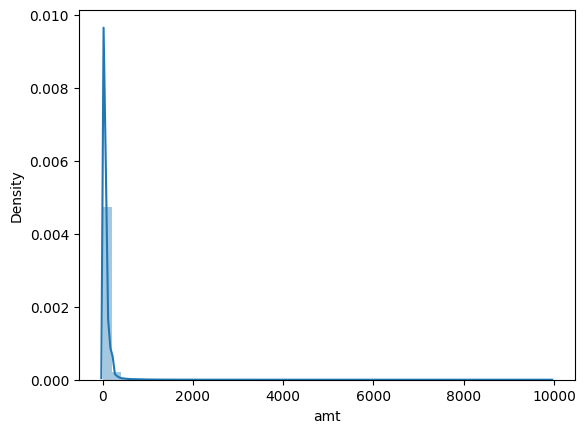

In [435]:
sns.distplot(card_df['amt'])

<ipython-input-436-d665a450fcfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(card_df['amt']))


<Axes: xlabel='amt', ylabel='Density'>

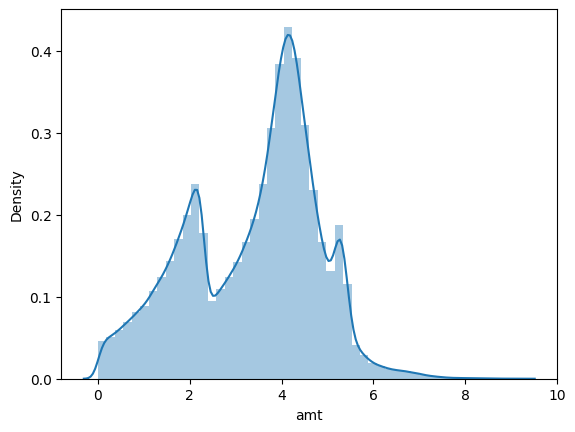

In [436]:
sns.distplot(np.log(card_df['amt']))

## One hot encoding
##### object 변수중 유용하다고 생각되는 변수 필터링 (category, gender, state, timelist)

In [437]:
card_df = pd.get_dummies(card_df, columns = ['category', 'gender', 'state', 'timelist'], drop_first = True)

In [438]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491120 entries, 0 to 491133
Data columns (total 72 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trans_date_trans_time   491120 non-null  datetime64[ns]
 1   cc_num                  491120 non-null  int64         
 2   merchant                491120 non-null  object        
 3   amt                     491120 non-null  float64       
 4   first                   491120 non-null  object        
 5   last                    491120 non-null  object        
 6   street                  491120 non-null  object        
 7   city                    491120 non-null  object        
 8   zip                     491120 non-null  int64         
 9   lat                     491120 non-null  float64       
 10  long                    491120 non-null  float64       
 11  city_pop                491120 non-null  int64         
 12  job                     491120 non-

## Column Drop
##### 0. trans_date_trans_time : 대체 컬럼인 timelist 존재
##### 1. cc_num : 카드번호는 개개인이 다르기에 이상 거래탐지 필요 x
##### 2. merchant : 장소가 너무 다양하기에 노이즈 발생 가능
##### 4, 5 : 사람이름은 개개인이 다르기에 이상 거래탐지 필요 x
##### 6, 7 : 대체 컬럼인 state 존재
##### 8 : 우편 번호 또한 state 컬럼이 존재하며 개개인이 다름
##### 9. 10 : 대체 컬럼인 loc_diff 존재
##### 11 : 이상 거래탐지에 도시 인구수는 별로..?
##### 12, 13 : 직업이 너무 광범위하게 다르며 생년월일은 필요 없음
##### 14 : 거래마다 전부 다르기에 번호는 필요가 없음
##### 15 : 대체 컬럼인 timelist 존재
##### 16, 17 : 대체 컬럼인 loc_diff 존재

In [445]:
pd.Series(card_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,amt
4,first
...,...
67,state_WV
68,state_WY
69,timelist_midnight
70,timelist_morning


In [447]:
select_col = list(card_df.columns[[3]]) + list(card_df.columns[18 : ])
card_df_f = card_df[select_col]

In [448]:
card_df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491120 entries, 0 to 491133
Data columns (total 55 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   amt                     491120 non-null  float64
 1   is_fraud                491120 non-null  int64  
 2   loc_diff(km)            491120 non-null  float64
 3   category_food           491120 non-null  bool   
 4   category_gas_transport  491120 non-null  bool   
 5   category_health         491120 non-null  bool   
 6   category_others         491120 non-null  bool   
 7   category_shopping       491120 non-null  bool   
 8   gender_M                491120 non-null  bool   
 9   state_AR                491120 non-null  bool   
 10  state_AZ                491120 non-null  bool   
 11  state_CA                491120 non-null  bool   
 12  state_CO                491120 non-null  bool   
 13  state_CT                491120 non-null  bool   
 14  state_FL                4

## Scaling
#### 데이터 전처리를 정규분포를 따르도록 수행 했기에 Standard Scaling 사용

In [449]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(card_df_f)

card_df_f_ss = pd.DataFrame(ss.transform(card_df_f), columns = card_df_f.columns)

In [450]:
card_df_f_ss

,amt,is_fraud,loc_diff(km),category_food,category_gas_transport,category_health,category_others,category_shopping,gender_M,state_AR,state_AZ,state_CA,state_CO,state_CT,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,timelist_midnight,timelist_morning,timelist_night
0,0.273044,-0.050393,-1.583099,1.938935,-0.321582,-0.397212,-0.364472,-0.731394,-0.627294,-0.192325,-0.134676,-0.183794,-0.094807,-0.094883,-0.179536,-0.086483,-0.094807,-0.086424,-0.183823,-0.160989,-0.156014,-0.128878,-0.155898,-0.086543,-0.179554,-0.094796,-0.247969,-0.128984,-0.161029,-0.134566,-0.094697,-0.200373,-0.094872,-0.094839,-0.129000,-0.151082,-0.094927,-0.223508,-0.12896,-0.086543,-0.208481,-0.183877,-0.08665,-0.122877,-0.335238,-0.094927,-0.1228,-0.128927,4.892989,-0.122868,-0.179373,-0.086448,2.258494,-0.464102,-0.652731
1,-0.169556,-0.050393,0.285276,1.938935,-0.321582,-0.397212,-0.364472,-0.731394,1.594150,-0.192325,-0.134676,-0.183794,-0.094807,-0.094883,-0.179536,-0.086483,-0.094807,-0.086424,-0.183823,-0.160989,-0.156014,-0.128878,-0.155898,-0.086543,-0.179554,-0.094796,-0.247969,-0.128984,-0.161029,-0.134566,-0.094697,-0.200373,-0.094872,-0.094839,7.751914,-0.151082,-0.094927,-0.223508,-0.12896,-0.086543,-0.208481,-0.183877,-0.08665,-0.122877,-0.335238,-0.094927,-0.1228,-0.128927,-0.204374,-0.122868,-0.179373,-0.086448,2.258494,-0.464102,-0.652731
2,-0.158442,-0.050393,-0.294092,1.938935,-0.321582,-0.397212,-0.364472,-0.731394,-0.627294,-0.192325,-0.134676,-0.183794,-0.094807,-0.094883,-0.179536,-0.086483,-0.094807,-0.086424,-0.183823,-0.160989,-0.156014,-0.128878,-0.155898,-0.086543,-0.179554,-0.094796,-0.247969,-0.128984,-0.161029,-0.134566,-0.094697,-0.200373,-0.094872,-0.094839,7.751914,-0.151082,-0.094927,-0.223508,-0.12896,-0.086543,-0.208481,-0.183877,-0.08665,-0.122877,-0.335238,-0.094927,-0.1228,-0.128927,-0.204374,-0.122868,-0.179373,-0.086448,2.258494,-0.464102,-0.652731
3,-0.032359,-0.050393,-1.853928,1.938935,-0.321582,-0.397212,-0.364472,-0.731394,1.594150,-0.192325,-0.134676,-0.183794,-0.094807,-0.094883,-0.179536,-0.086483,-0.094807,-0.086424,-0.183823,-0.160989,-0.156014,-0.128878,-0.155898,-0.086543,-0.179554,-0.094796,4.032762,-0.128984,-0.161029,-0.134566,-0.094697,-0.200373,-0.094872,-0.094839,-0.129000,-0.151082,-0.094927,-0.223508,-0.12896,-0.086543,-0.208481,-0.183877,-0.08665,-0.122877,-0.335238,-0.094927,-0.1228,-0.128927,-0.204374,-0.122868,-0.179373,-0.086448,2.258494,-0.464102,-0.652731
4,-0.304984,-0.050393,0.110437,-0.515747,-0.321582,-0.397212,2.743696,-0.731394,-0.627294,-0.192325,-0.134676,-0.183794,-0.094807,-0.094883,-0.179536,-0.086483,-0.094807,-0.086424,-0.183823,-0.160989,-0.156014,-0.128878,6.414466,-0.086543,-0.179554,-0.094796,-0.247969,-0.128984,-0.161029,-0.134566,-0.094697,-0.200373,-0.094872,-0.094839,-0.129000,-0.151082,-0.094927,-0.223508,-0.12896,-0.086543,-0.208481,-0.183877,-0.08665,-0.122877,-0.335238,-0.094927,-0.1228,-0.128927,-0.204374,-0.122868,-0.179373,-0.086448,2.258494,-0.464102,-0.652731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491115,0.464398,-0.050393,0.741228,-0.515747,-0.321582,-0.397212,-0.364472,1.367252,-0.627294,-0.192325,-0.134676,-0.183794,-0.094807,-0.094883,-0.179536,-0.086483,-0.094807,-0.086424,-0.183823,-0.160989,-0.156014,-0.128878,-0.155898,-0.086543,-0.179554,-0.094796,-0.247969,-0.128984,-0.161029,-0.134566,-0.094697,4.990697,-0.094872,-0.094839,-0.129000,-0.151082,-0.094927,-0.223508,-0.12896,-0.086543,-0.208481,-0.183877,-0.08665,-0.122877,-0.335238,-0.094927,-0.1228,-0.128927,-0.204374,-0.1228

## 차원 축소(PCA)
#### 컬럼이 54개이기에 PCA를 이용하여 컬럼을 축소함(목표치 : 70%)

In [458]:
from sklearn.decomposition import PCA

pca = PCA(35)

pca.fit(card_df_f_ss)

pd.DataFrame(pca.fit_transform(card_df_f_ss))
pca.explained_variance_ratio_.sum()

0.6992409481263806

## 회고

<br/>

##### 사실 해당 과정을 공부하기 전까지만 하더라도 feature engineering에 관해서 개념을 잡지 못하는 상태였다.
##### 캐글 대회 코드를 들여다 보면 항상 나오는 목차로 Feature Engineering에 관하여 나오는데 도대체가 뭐 어떤식인지 감이 오지 않았다.
##### 해당 프로젝트를 하면서 feature engineering이 뭔지 확실하게 알았으며
##### 지난주에 이어서 코드를 들여다보고 어떤 과정으로 할지 조금 더 명확해 진것 같다.
##### 하지만 아직 스스로도 부족한 점을 느꼈으며 가장 큰 부분은 바로 변수를 고르는 것이다.
##### 다른 2개의 변수를 가지고 가설을 세우고 검증하는 과정에서 너무 나의 주관적인 생각들을 가지고 하다 보니
##### 검증단계에서 시간만 지체되고 성과는 없는 문제가 존재했다.(요주 인물 컬럼)
##### 그러다보니 다른 해야할 작업들에 있어서 시간적 여유로 하지 못하는 상황 또한 존재하였다.
##### ex) 카테고리 분류 작업  **(merchant(결제 장소),job(직업))**
##### 변수들간의 상관 관계를 분석해서 볼 수 있으면 좋겠지만 아직 corr()밖에 다루지 못하기에 범주형 변수가 존재할 경우 어떤식으로 관계를 봐야하는지가 아직 감이 잘 오지 않으며 이 부분은 계속해서 공부하며 채워나가야 할 것 같다.
##### 성격상 급하게하면 항상 놓치는 부분이 존재하기에 시간이 없다고 해서 더 빠르게 하지는 않을 것이다.
##### 항상 몰두해서 하다보니 그런것 같기도..? :D
